<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

## Unsupervised-Learning-Project 2401FTDS: Team EG-3
© ExploreAI Academy

---

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEidtLtnam_bUJws2nXbAjWSwNIOIhclIht46ZAX-4EzF2KMbkT2HX5Zdgr19wcIwPDeLJmQPIIPQG_BcYf3mkKfPJJTuMe4FYOVq75vTXU3uXl_x7Vp6Nk4UI_7lvv3119D278ogajfsilK/s3172/h6OWT9.jpg"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Background](#sub_section_1_1_1)
        * [1.1.2 Problem Statement](#sub_section_1_1_2)
        * [1.1.3 Data Sourcing](#sub_section_1_1_3)
        * [1.1.4 Importance of the Study](#sub_section_1_1_4)
        * [1.1.5 Key Questions/Hypothesis](#sub_section_1_1_5)
        * [1.1.6 Expected Outcomes](#sub_section_1_1_6)
    * [1.2 Project Objectives](#section_1_2)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. ***](#chapter6)
* <b>[7. ***](#chapter7)
* <b>[8. Conclusion](#chapter8)
* <b>[9. References](#chapter9)

## 1.1 Introduction

> <b> 1.1.1 Background: </b>


> <b> 1.1.2 Problem Statement: </b>


> <b> 1.1.3 Data Sourcing: </b>


> <b> 1.1.4 Importance of the Study: </b>


> <b> 1.1.5 Key Questions/Hypothesis: </b>

> <b> 1.1.6 Aim: </b>


> <b> 1.1.7 Expected outcomes: </b>



## 1.2 Project Objectives

---
# 2. Importing Packages

The necessary packages were imported to facilitate data manipulation, machine learning, model evaluation, and visualization. Warnings were also suppressed to ensure cleaner output.

In [21]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357255 sha256=3e0c71d20acac178700483d79896a17942787ecbd610297d0363564a31fc2c9b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [40]:
#MLflow tracking
import mlflow
import pickle

# Data manipulation and analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

----
# 3. Loading Data
The data used for this project was located in the ().csv file. To better manipulate and analyse the titles.csv file, it was loaded into a Pandas Data Frame using the Pandas function, .read_csv() and referred to as df. For demonstrating the column index in the dataframe , index_col=False was implemented.

In [5]:
#Load data training, testing, and anime data
train_df = pd.read_csv('Data/train.csv')
anime_df = pd.read_csv('Data/anime.csv')
test_df = pd.read_csv('Data/test.csv')

<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [6]:
#The copy of the dataframe
anime_df_copy = anime_df.copy()
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [7]:
#Display Anime data
anime_df_copy.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
#Display Training data
train_df_copy.head()

,user_id,anime_id,rating
0,1,11617,10.0
1,1,11757,10.0
2,1,15451,10.0
3,2,11771,10.0
4,3,20,8.0


In [9]:
#Display Testing data
test_df_copy.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


----
# 4. Data Cleaning <a class="anchor" id="chapter4"></a>

**Checking any missing values**

Checking for missing values involves examining each column in the datasets to ensure completeness and data integrity. This ensures that all required data points are present, avoiding potential errors or biases in subsequent analyses or modeling tasks.

In [10]:
# 1. Handling missing values
# Checking for missing values
print("\nMissing values in Anime Data")
print(anime_df_copy.isnull().sum())

print("\nMissing values in Test Data")
print(test_df_copy.isnull().sum())

print("\nMissing values in Train Data")
print(train_df_copy.isnull().sum())


Missing values in Anime Data
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in Test Data
user_id     0
anime_id    0
dtype: int64

Missing values in Train Data
user_id     0
anime_id    0
rating      1
dtype: int64


<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

In [11]:
import numpy as np
# Function to impute missing values
def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == np.number:
            if df[column].skew() > 0.5:
                df[column].fillna(df[column].median(), inplace=True)
            else:
                df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Apply the imputation function
anime_df_cleaned = impute_missing_values(anime_df_copy)
train_df_cleaned = impute_missing_values(train_df_copy)
test_df_cleaned = impute_missing_values(test_df_copy)

In [12]:
# Check for missing values again
print("Missing values in anime_df:\n", anime_df_cleaned.isnull().sum())

Missing values in anime_df:
 anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Checking duplicates**

Checking duplicates involves verifying whether there are any repeated entries within the datasets. This ensures data consistency and reliability for accurate analysis and modeling.

In [13]:
# 2. Checking for duplicates
print("\nDuplicates in Anime Data:", anime_df_cleaned.duplicated().sum())
print("Duplicates in Test Data:", test_df_cleaned.duplicated().sum())
print("Duplicates in Train Data:", train_df_cleaned.duplicated().sum())

# Dropping duplicates if any
anime_df_cleaned = anime_df_cleaned.drop_duplicates()
test_df_cleaned = test_df_copy.drop_duplicates()
train_df_cleaned = train_df_copy.drop_duplicates()


Duplicates in Anime Data: 0
Duplicates in Test Data: 0
Duplicates in Train Data: 0


<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Ensuring data consistency in data types**

Ensuring data consistency in data types is crucial for accurate data analysis and processing, as mismatched types can lead to errors and incorrect results. Consistent data types facilitate seamless integration of datasets, reliable computations, and proper application of data transformations. Adhering to the correct data types is fundamental for maintaining the integrity of data-driven insights and achieving reproducible outcomes in analyses.

In [14]:
# 3. Ensuring consistent data types
print("\nData types in Anime Data")
print(anime_df_cleaned.dtypes)

print("\nData types in Test Data")
print(test_df_cleaned.dtypes)

print("\nData types in Train Data")
print(train_df_cleaned.dtypes)

# Convert data types if necessary
# Assuming 'episodes' in anime_df should be numeric, convert if needed
anime_df_cleaned['episodes'] = pd.to_numeric(anime_df_cleaned['episodes'], errors='coerce')
anime_df_cleaned = anime_df_cleaned.dropna(subset=['episodes'])

# Display the cleaned data
print("\nCleaned Anime Data")
print(anime_df_cleaned.head())

print("\nCleaned Test Data")
print(test_df_copy.head())

print("\nCleaned Train Data")
print(train_df_copy.head())


Data types in Anime Data
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

Data types in Test Data
user_id     int64
anime_id    int64
dtype: object

Data types in Train Data
user_id       int64
anime_id      int64
rating      float64
dtype: object

Cleaned Anime Data
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3     

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

----
# 5. Exploritory Data Analysis

**Basic Information**

This code prints a concise summary of each dataset, including the number of non-null entries, data types, and memory usage. It helps identify missing values and understand the overall structure of the datasets.

In [15]:
print("Anime Data Info")
print(anime_df_cleaned.info())
print("\nTrain Data Info")
print(train_df_cleaned.info())

Anime Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 11954 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11954 non-null  int64  
 1   name      11954 non-null  object 
 2   genre     11954 non-null  object 
 3   type      11954 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    11954 non-null  float64
 6   members   11954 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 747.1+ KB
None

Train Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018873 entries, 0 to 1018872
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user_id   1018873 non-null  int64  
 1   anime_id  1018873 non-null  int64  
 2   rating    1018873 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 23.3 MB
None


<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Statistical Summary**

This code provides a statistical summary of the numerical columns in each dataset, including count, mean, standard deviation, and percentiles. It helps understand the distribution and central tendencies of the data.

In [16]:
print("Anime Data Description")
print(anime_df_cleaned.describe())
print("\nTest Data Description")
print(test_df_cleaned.describe())
print("\nTrain Data Description")
print(train_df_cleaned.describe())

Anime Data Description
           anime_id      episodes        rating       members
count  11954.000000  11954.000000  11954.000000  1.195400e+04
mean   13589.705120     12.382550      6.480291  1.836856e+04
std    11209.052798     46.865352      1.018655  5.511078e+04
min        1.000000      1.000000      1.670000  5.000000e+00
25%     3380.250000      1.000000      5.890000  2.290000e+02
50%     9934.500000      2.000000      6.560000  1.579500e+03
75%    23644.500000     12.000000      7.180000  9.755500e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06

Test Data Description
             user_id       anime_id
count  633686.000000  633686.000000
mean    36777.752605    8909.389543
std     21028.330970    8880.430436
min         1.000000       1.000000
25%     18974.000000    1240.000000
50%     36919.000000    6213.000000
75%     54908.000000   14131.000000
max     73516.000000   34367.000000

Train Data Description
            user_id      anime_id        rating


<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Checking Data Distributions**

This code visualizes the distribution of ratings in the training dataset using a histogram and a kernel density estimate (KDE). It helps identify patterns, skewness, and the spread of rating values.

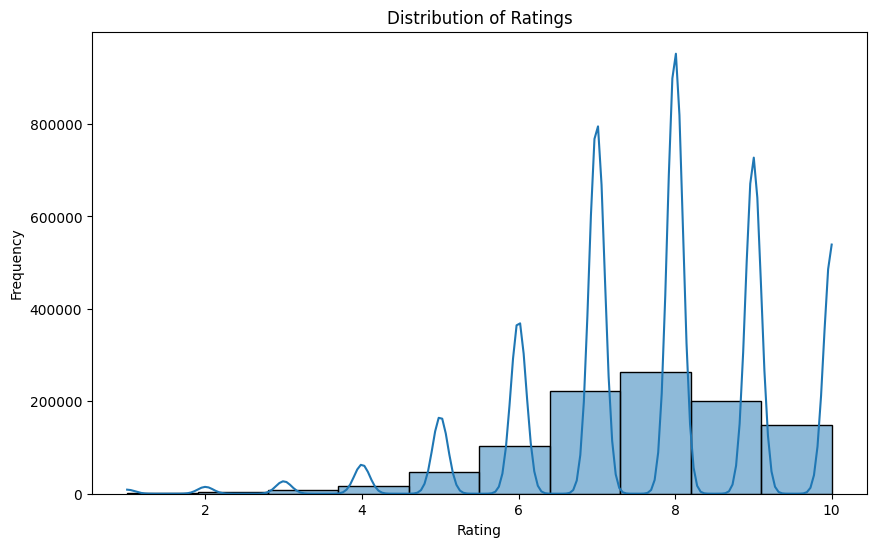

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings in train data
plt.figure(figsize=(10, 6))
sns.histplot(train_df_cleaned['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

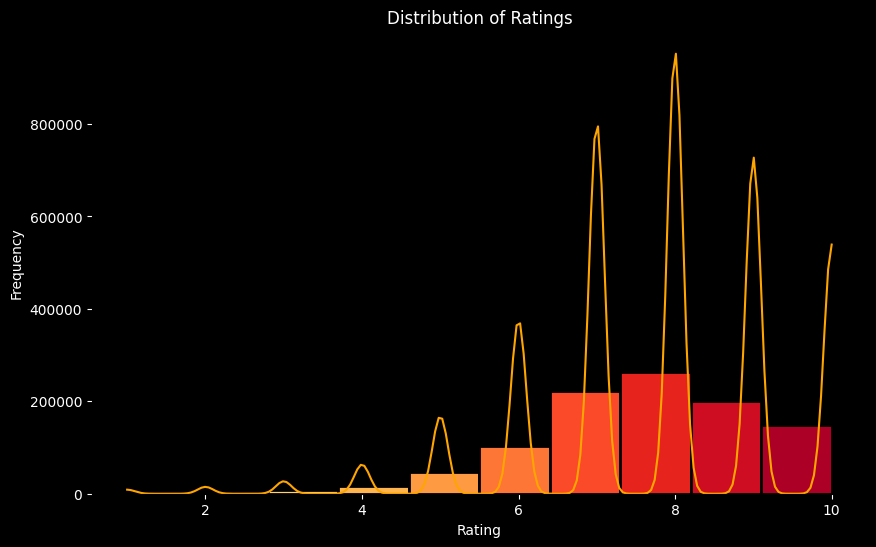

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Custom color palette
colors = sns.color_palette("YlOrRd", 10)

# Plotting the distribution of ratings in train data
plt.figure(figsize=(10, 6), facecolor='black')
ax = sns.histplot(train_df_cleaned['rating'], bins=10, kde=True, color='orange', edgecolor='black', linewidth=2)

for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

#adjusting the colour settings
ax.set_facecolor('black')
plt.title('Distribution of Ratings', color='white')
plt.xlabel('Rating', color='white')
plt.ylabel('Frequency', color='white')
ax.tick_params(colors='white')

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Relationship between Variables**

Correlation Mix: This code generates a heatmap of the correlation matrix for the training data, showing the relationship between different numerical variables. It helps identify multicollinearity and potential predictors for modeling.

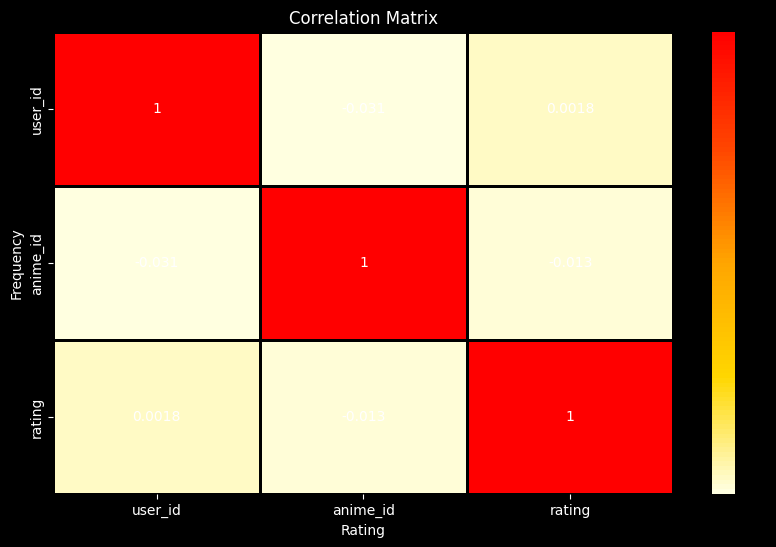

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap creation
colors = ["#FFFFE0", "#FFD700", "#FFA500", "#FF4500", "#FF0000"]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_yelorred'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Correlation matrix for train data
plt.figure(figsize=(10, 6), facecolor='black')  # Set the figure background to black
ax = sns.heatmap(train_df_cleaned.corr(), annot=True, cmap=cmap, linewidths=2, linecolor='black')

#adjusting the colour settings
ax.set_facecolor('black')
plt.title('Correlation Matrix', color='white')
plt.xlabel('Rating', color='white')
plt.ylabel('Frequency', color='white')
ax.tick_params(colors='white')
for text in ax.texts:
    text.set_color('white')

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Ratings by Anime Type**

This code calculates and visualizes the average rating for each anime type using a bar plot. It helps understand which types of anime tend to receive higher ratings and may influence user preferences.

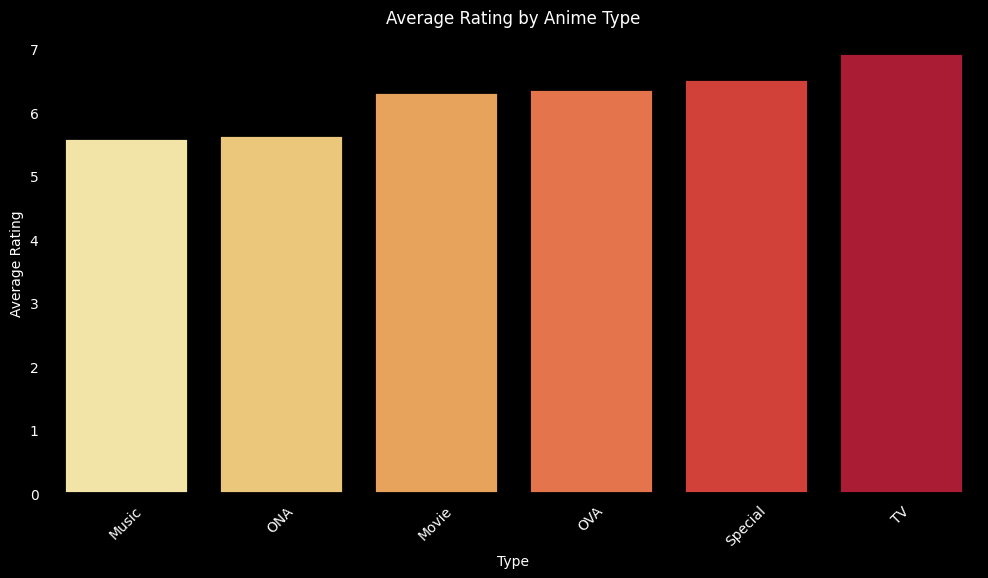

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the mean rating by anime type
type_ratings = anime_df_cleaned.groupby('type')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6), facecolor='black')  # Set the figure background to black
ax = sns.barplot(x=type_ratings.index, y=type_ratings.values, palette="YlOrRd")

# Setting the background to black
ax.set_facecolor('black')

# Customize the bars' edge color and width
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

# Setting the title, labels, and tick labels color to white
plt.title('Average Rating by Anime Type', color='white')
plt.xlabel('Type', color='white')
plt.ylabel('Average Rating', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Analysing Popularity**

_Top Ten most Rated Animes_: This code identifies and visualizes the top 10 most rated animes based on the number of members using a bar plot. It helps identify popular animes that have a large audience and engagement.

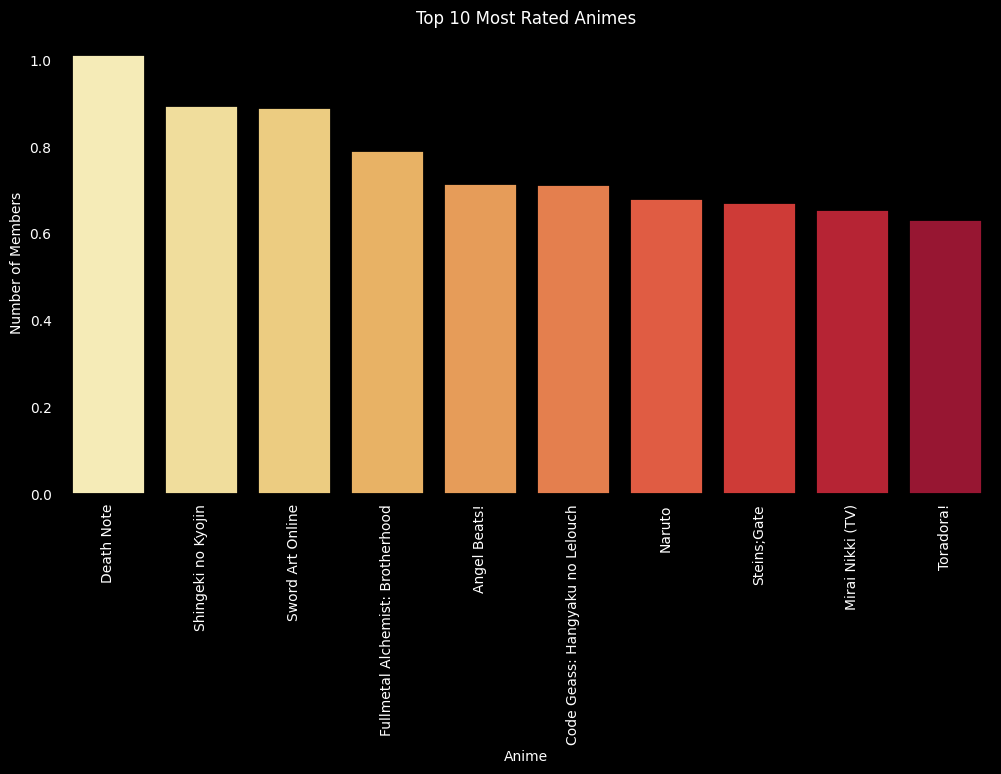

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 10 animes by number of members
top_animes = anime_df_cleaned.sort_values(by='members', ascending=False).head(10)

plt.figure(figsize=(12, 6), facecolor='black')  # Set the figure background to black
ax = sns.barplot(x=top_animes['name'], y=top_animes['members'], palette="YlOrRd")

# Setting the background to black
ax.set_facecolor('black')

# Customization of the bars' edge color and width
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

# Setting the title, labels, and tick labels color to white
plt.title('Top 10 Most Rated Animes', color='white')
plt.xlabel('Anime', color='white')
plt.ylabel('Number of Members', color='white')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')

plt.show()

_Top Ten Highest Rated Anime_: This code identifies and visualizes the top 10 highest-rated animes using a bar plot. It helps highlight critically acclaimed animes that have received the highest user ratings.

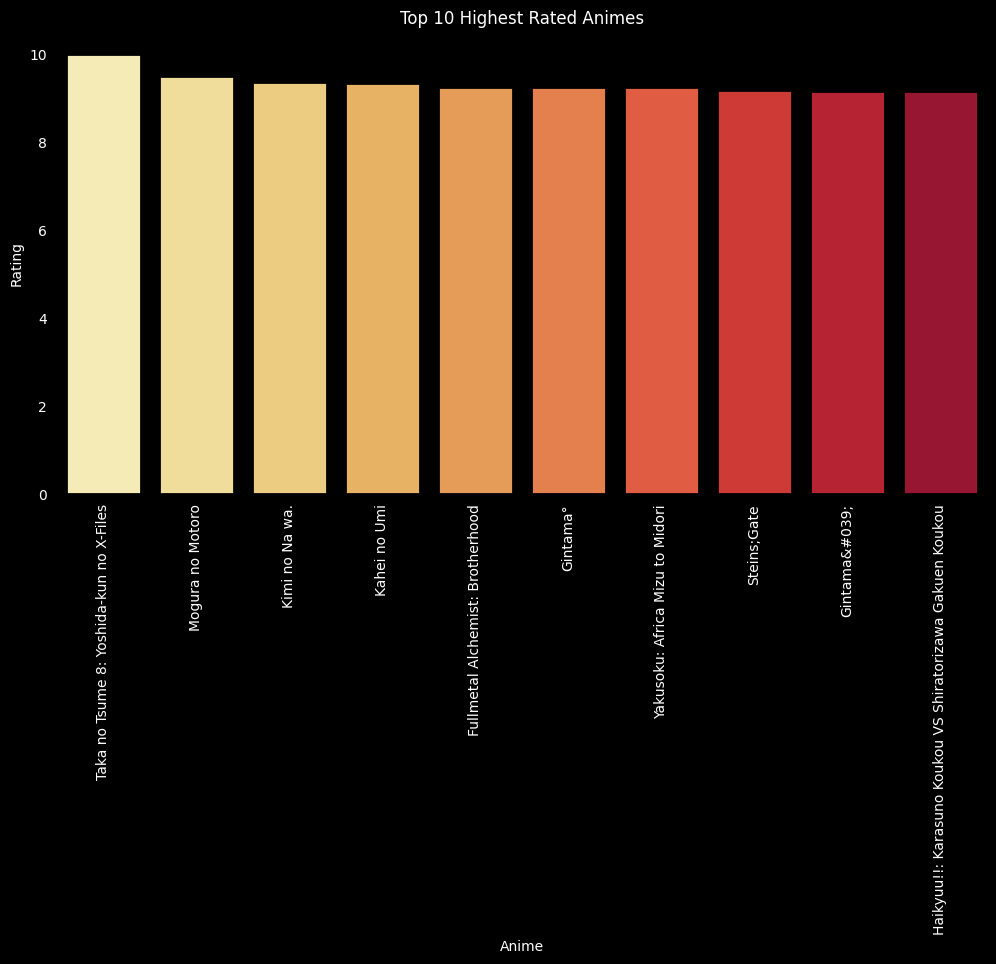

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 10 animes by rating
top_rated_animes = anime_df_cleaned.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(12, 6), facecolor='black')  # Set the figure background to black
ax = sns.barplot(x=top_rated_animes['name'], y=top_rated_animes['rating'], palette="YlOrRd")

# Setting the axes background to black
ax.set_facecolor('black')

# Customization of the bars' edge color and width
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

# Setting the title, labels, and tick labels color to white
plt.title('Top 10 Highest Rated Animes', color='white')
plt.xlabel('Anime', color='white')
plt.ylabel('Rating', color='white')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**User Analysis**

_User Activity_: This code identifies and visualizes the top 10 most active users based on the number of ratings they have given using a bar plot. It helps understand user engagement and the most influential users in the dataset.

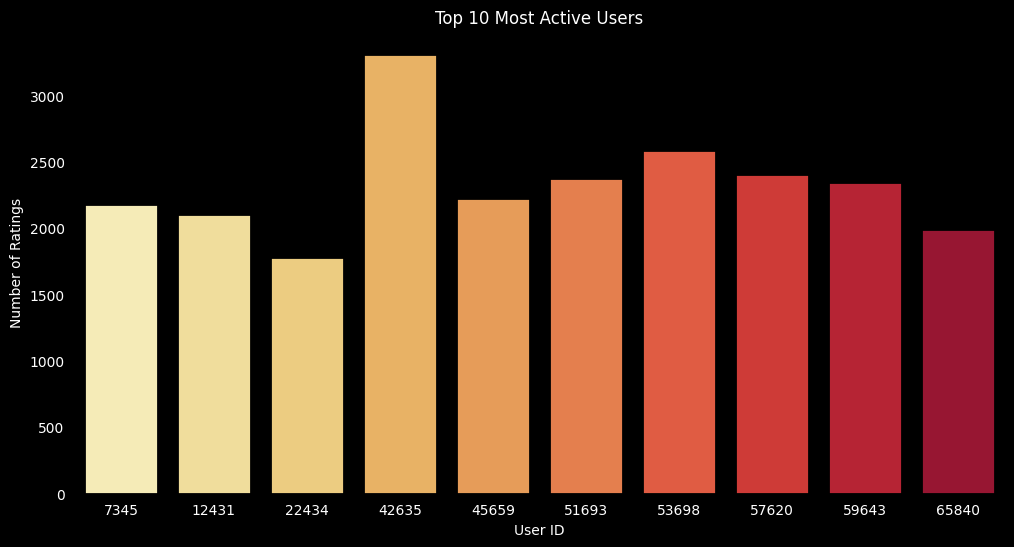

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# The top 10 most active users by number of ratings
user_activity = train_df_cleaned['user_id'].value_counts().head(10)

plt.figure(figsize=(12, 6), facecolor='black')  # Set the figure background to black
ax = sns.barplot(x=user_activity.index, y=user_activity.values, palette="YlOrRd")

# Setting the axes background to black
ax.set_facecolor('black')

# Customization of the bars' edge color and width
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

# Setting the title, labels, and tick labels color to white
plt.title('Top 10 Most Active Users', color='white')
plt.xlabel('User ID', color='white')
plt.ylabel('Number of Ratings', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

**Genre Analysis**

_Most Common Genres_: This code identifies and visualizes the top 10 most common genres in the anime dataset using a bar plot. It helps understand the prevalence of different genres and their popularity among users.

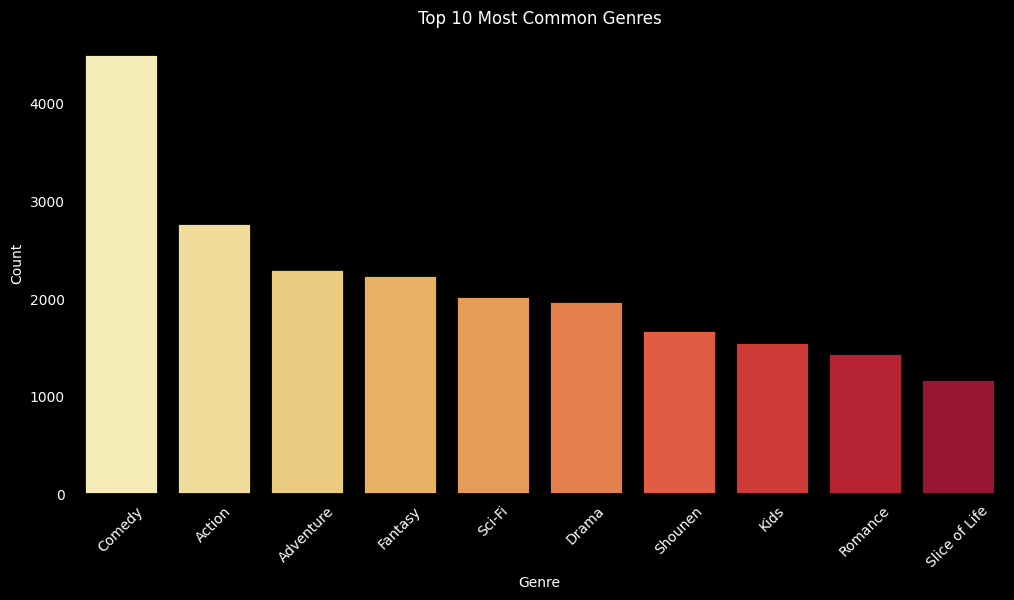

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extraction and count of the genres
genres = anime_df_cleaned['genre'].str.split(', ')
genre_list = [item for sublist in genres.dropna() for item in sublist]
genre_counts = Counter(genre_list)
most_common_genres = genre_counts.most_common(10)

# Unzip the most common genres into separate lists
genres, counts = zip(*most_common_genres)

plt.figure(figsize=(12, 6), facecolor='black')
ax = sns.barplot(x=list(genres), y=list(counts), palette="YlOrRd")
ax.set_facecolor('black')

# Customization of the bars' edge color and width
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

# Setting the title, labels, and tick labels color to white
plt.title('Top 10 Most Common Genres', color='white')
plt.xlabel('Genre', color='white')
plt.ylabel('Count', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

In [ ]:
# The occurrences of each type
type_counts = anime_df_cleaned['type'].value_counts()
print(type_counts)

type
TV         3578
OVA        3261
Movie      2344
Special    1671
ONA         613
Music       487
Name: count, dtype: int64


<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

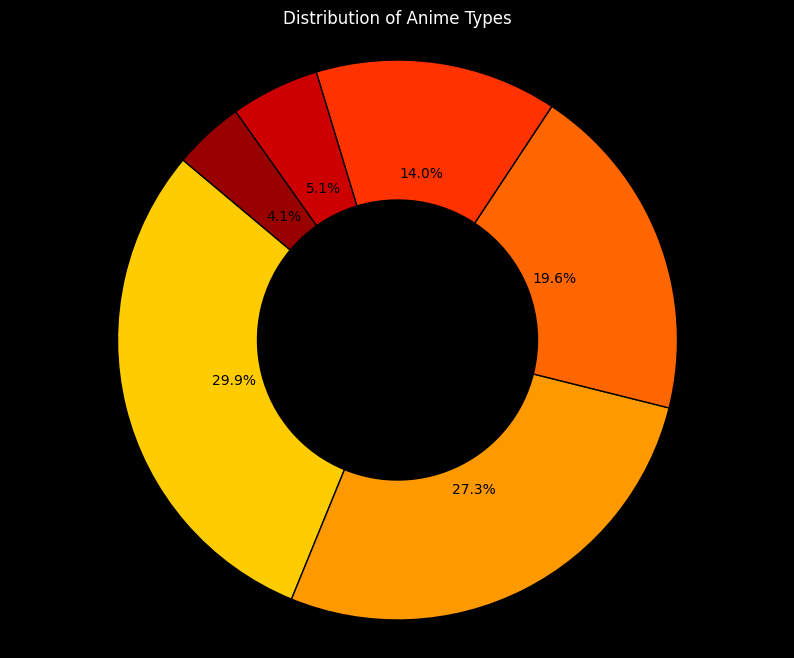

In [ ]:
import matplotlib.pyplot as plt

# Customization of color palette
colors = ["#FFCC00", "#FF9900", "#FF6600", "#FF3300", "#CC0000", "#990000", "#660000", "#FF9999", "#FF6666", "#FF3333"]

# Plotting of the donut chart
plt.figure(figsize=(10, 8), facecolor='black')  # Set the figure background to black

# Plotting of the pie chart
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.5, 'edgecolor': 'black'}
)

# Setting the title color
plt.title('Distribution of Anime Types', color='white')
plt.axis('equal')

# Setting the background color to black
plt.gca().set_facecolor('black')

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">

**Insights:**

</div>

----
# 6. Preprocessing

In [22]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [23]:
# Convert the train data into a format suitable for Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train_df_cleaned[['user_id', 'anime_id', 'rating']], reader)

In [24]:
# Build the trainset and testset
trainset = data.build_full_trainset()

----
# 7. Modeling

In [25]:
# Initialize the SVD model
algo = SVD()

# Train the model on the trainset
algo.fit(trainset)

In [27]:
# Predict ratings for the test data
testset = [(row['user_id'], row['anime_id'], 0) for index, row in test_df_cleaned.iterrows()]
predictions = algo.test(testset)

In [37]:
# Calculate and print the RMSE
rmse = accuracy.rmse(predictions)

RMSE: 7.9865


In [30]:
# Create a DataFrame to store the predictions
submission_data = {
    'ID': [f"{pred.uid}_{pred.iid}" for pred in predictions],
    'rating': [pred.est for pred in predictions]
}

In [38]:
submission_df = pd.DataFrame(submission_data)
# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [32]:
# Display a preview of the saved CSV
print(submission_df.head(10))

            ID    rating
0  40763_21405  8.187329
1  68791_10504  7.085669
2   40487_1281  8.001348
3    55290_165  8.111299
4  72323_11111  8.199447
5   31109_2144  7.113130
6  20474_31790  6.740258
7    60432_245  9.047453
8    21853_934  8.569915
9   53474_2104  8.301842


In [33]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      633686 non-null  object 
 1   rating  633686 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.7+ MB


Content based

In [41]:
# Vectorize the genre column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(anime_df_cleaned['genre'])

In [42]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [67]:
# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = anime_df_cleaned[anime_df_cleaned['name'] == title].index[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return print("Top 10 most similar Animes:\n",anime_df_cleaned[['name', 'rating','type']].iloc[anime_indices])

In [68]:
print(get_recommendations('Naruto'))

Top 10 most similar Animes:
                                                    name  rating     type
4540                                 Trava: Fist Planet    6.70      OVA
1906  Mobile Suit Gundam 00 The Movie: A Wakening of...    7.41    Movie
2130               Super Robot Taisen OG: The Inspector    7.35       TV
2165                                Sei Juushi Bismarck    7.34       TV
2828                            Aldnoah.Zero 2nd Season    7.15       TV
4749                       Uchuu Senshi Baldios (Movie)    6.65    Movie
4908                             Mobile Suit Gundam AGE    6.60       TV
5226                            Rokushin Gattai GodMars    6.52       TV
6267  Gundam: G no Reconguista - From the Past to th...    6.20  Special
6474                     Rokushin Gattai GodMars (1982)    6.10    Movie
None


# 09. References <a class="anchor" id="chapter11"></a>

#### <a href=#cont>Back to Table of Contents</a>

---